In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/deep_project/dataset


/content/drive/.shortcut-targets-by-id/1KPWgn87528XMA7gXUL0zWM2FarJh1usG/deep_project/dataset


In [3]:
%ls

DATA/  data.zip  number_of_samples.csv


In [4]:
from zipfile import ZipFile
import os

def get_all_file_paths(directory):

    # initializing empty file paths list
    file_paths = []

    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)

    # returning all file paths
    return file_paths

def main():
    # path to folder which needs to be zipped
    directory = '/content/drive/MyDrive/car-calssification/data.zip'

    # calling function to get all file paths in the directory
    file_paths = get_all_file_paths(directory)

    # printing the list of all files to be zipped
    #print('Following files will be zipped:')
    for file_name in file_paths:
        print(file_name)

    # writing files to a zipfile
    with ZipFile('data.zip','w') as zip:
        # writing each file one by one
        for file in file_paths:
            zip.write(file)

    print('All files zipped successfully!')


if __name__ == "__main__":
    main()

All files zipped successfully!


In [5]:
import shutil
shutil.make_archive('/content/drive/MyDrive/deep_project/dataset/data', 'zip', '/content/drive/MyDrive/deep_project/dataset')

'/content/drive/MyDrive/deep_project/dataset/data.zip'

In [ ]:
%cd DATA

/content/drive/.shortcut-targets-by-id/1KPWgn87528XMA7gXUL0zWM2FarJh1usG/deep_project/dataset/DATA


In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
import pickle
import os
import glob as gb
import random
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential, Model
from tensorflow.keras.utils import get_file
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout,Input, Add, Activation, ZeroPadding2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D

In [ ]:
# Reading CSV File
df = pd.read_csv('/content/drive/MyDrive/deep_project/dataset/number_of_samples.csv')
df

,Unnamed: 0,Name of class,Number of files
0,0,bmw serie 1,82
1,1,chevrolet spark,108
2,2,chevroulet aveo,129
3,3,clio,344
4,4,duster,280
5,5,Golf,160
6,6,hyundai i10,130
7,7,hyundai tucson,128
8,8,logan,112
9,9,megane,280


In [ ]:
# Number of Cars images per class
plt.figure(figsize=(20,5))
sns.barplot(y = df["Number of files"], x = df["Name of class"], palette = "inferno")
plt.title("Number of Cars images per class")
plt.show()

NameError: name 'df' is not defined

<Figure size 2000x500 with 0 Axes>

In [ ]:
# Reading image dataset
dataset = '/content/drive/MyDrive/deep_project/dataset/DATA'

In [ ]:
# Name of each directory
data = os.listdir(dataset)
data

['Golf',
 'bmw serie 1',
 'chevrolet spark',
 'chevroulet aveo',
 'clio',
 'duster',
 'hyundai i10',
 'hyundai tucson',
 'logan',
 'megane',
 'mercedes class a',
 'nemo citroen',
 'octavia',
 'picanto',
 'polo',
 'sandero',
 'seat ibiza',
 'symbol',
 'toyota corolla',
 'volkswagen tiguan',
 '.ipynb_checkpoints',
 'X.pickle',
 'y.pickle']

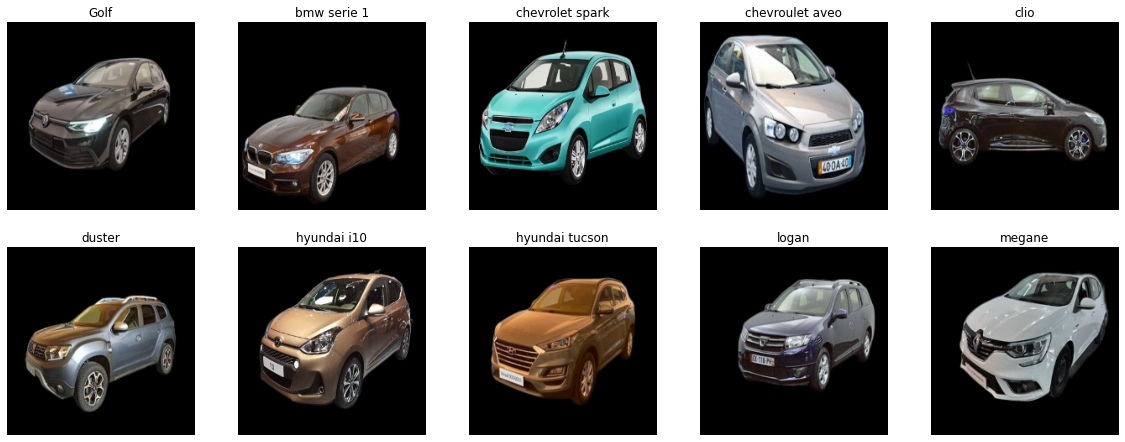

In [ ]:
# Generate random sample with title of class to visualise
plt.figure(figsize=(20, 20))
for i in range(10):
    px = plt.subplot(5, 5, i + 1)
    rand = random.randrange(1, 30)
    current_dir = os.listdir(dataset+'/'+str(data[i]))
    img = cv2.imread(dataset+'/'+str(data[i])+'/'+current_dir[rand])
    plt.imshow(img )
    plt.title(data[i])
    plt.axis("off")

plt.show()

Input image shape is  (224, 224, 3)


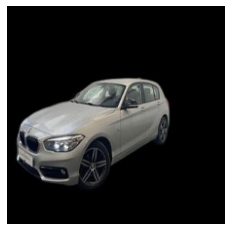

In [ ]:
# image size
img_path = r'/content/drive/MyDrive/deep_project/dataset/DATA/bmw serie 1/back1.jpg'
img = plt.imread(img_path)
print ('Input image shape is ',img.shape)
plt.axis('off')
imshow(img)

**2222 Data Pipeline**



In [ ]:
# Create an empty list to store the labels
labels = []

# Define the path to the image directory
image_dir = '/content/drive/MyDrive/deep_project/dataset/DATA'

# Get a list of all subdirectories in the image directory
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through the subdirectories
for folder in folders:
    # Get the name of the folder
    label = folder
    # Append the label to the labels list
    labels.append(label)

In [ ]:
# Create lists to store the filenames and labels
filenames = []
labels = []

# Define the path to the image directory
image_dir = '/content/drive/MyDrive/deep_project/dataset/DATA'

# Get a list of all subdirectories in the image directory
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through the subdirectories
for folder in folders:
    # Get the name of the folder (label)
    label = folder
    # Get a list of all files in the subdirectory
    folder_path = os.path.join(image_dir, folder)
    files = os.listdir(folder_path)
    # Iterate through the files
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(folder_path, file)
        # Append the file path and label to the lists
        filenames.append(file_path)
        labels.append(label)

In [ ]:
# Create a dataframe with the filenames and labels
df = pd.DataFrame({'filename': filenames, 'label': labels})

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Create empty lists to store the images and labels
X = []
y = []

# Load the images
for i, row in df.iterrows():
    # Open the image
    img = Image.open(row['filename'])
    # Resize the image
    img = img.resize((224, 224))
    # Convert the image to an array
    img_array = np.array(img)
    # Append the image to the images list
    X.append(img_array)
    # Append the label to the labels list
    y.append(row['label'])

In [ ]:
# save the images and labels to a pickle file
file_x = open('/content/drive/MyDrive/deep_project/dataset/DATA/X.pickle', 'wb')
pickle.dump(X, file_x)
file_x.close()

file_y = open('/content/drive/MyDrive/deep_project/dataset/DATA/y.pickle', 'wb')
pickle.dump(y, file_y)
file_y.close()

In [ ]:
X = pickle.load(open('/content/drive/MyDrive/deep_project/dataset/DATA/X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/deep_project/dataset/DATA/y.pickle', 'rb'))

In [ ]:
# labe encoding the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# One-hot encode the labels
y = to_categorical(y, num_classes=20)

In [ ]:
# Reshape the X array
X = np.reshape(X, (len(X), 224, 224, 3))

training and testing data

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# numbers of each part
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2588, 224, 224, 3)
(2588, 20)
(647, 224, 224, 3)
(647, 20)


Data augmentation

In [ ]:
# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Create the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.3))
# output layer
model.add(Dense(20, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=(224, 224, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=20, activation='softmax'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                      

In [ ]:
# Fit the model on the batches generated by datagen.flow()
model.fit(datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=len(X_train) / 64, epochs=50,
          workers=-1,use_multiprocessing=True,
          validation_data = (X_test, y_test))

Epoch 1/50
40/40 [==============================] - 244s 6s/step - loss: 0.2291 - accuracy: 0.0846 - val_loss: 0.2242 - val_accuracy: 0.1175
Epoch 2/50
40/40 [==============================] - 246s 6s/step - loss: 0.1950 - accuracy: 0.1117 - val_loss: 0.2059 - val_accuracy: 0.1113
Epoch 3/50
40/40 [==============================] - 241s 6s/step - loss: 0.1926 - accuracy: 0.1225 - val_loss: 0.1930 - val_accuracy: 0.1267
Epoch 4/50
40/40 [==============================] - 253s 6s/step - loss: 0.1910 - accuracy: 0.1310 - val_loss: 0.2005 - val_accuracy: 0.1159
Epoch 5/50
40/40 [==============================] - 240s 6s/step - loss: 0.1886 - accuracy: 0.1406 - val_loss: 0.1942 - val_accuracy: 0.1283
Epoch 6/50
40/40 [==============================] - 240s 6s/step - loss: 0.1856 - accuracy: 0.1549 - val_loss: 0.2052 - val_accuracy: 0.1097
Epoch 7/50
40/40 [==============================] - 241s 6s/step - loss: 0.1847 - accuracy: 0.1611 - val_loss: 0.1864 - val_accuracy: 0.1607
Epoch 8/50
40

In [ ]:
model.fit(X_train, y_train,
          epochs = 100, batch_size = 32,
          verbose=1,
          validation_data = (X_test, y_test))

Epoch 1/100
81/81 [==============================] - 232s 3s/step - loss: 0.0876 - accuracy: 0.6781 - val_loss: 0.0943 - val_accuracy: 0.6754
Epoch 2/100
81/81 [==============================] - 211s 3s/step - loss: 0.0407 - accuracy: 0.8895 - val_loss: 0.0841 - val_accuracy: 0.7543
Epoch 3/100
81/81 [==============================] - 211s 3s/step - loss: 0.0168 - accuracy: 0.9714 - val_loss: 0.0768 - val_accuracy: 0.8130
Epoch 4/100
81/81 [==============================] - 211s 3s/step - loss: 0.0093 - accuracy: 0.9872 - val_loss: 0.0729 - val_accuracy: 0.8423
Epoch 5/100
81/81 [==============================] - 211s 3s/step - loss: 0.0063 - accuracy: 0.9942 - val_loss: 0.0697 - val_accuracy: 0.8810
Epoch 6/100
81/81 [==============================] - 211s 3s/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.0658 - val_accuracy: 0.8964
Epoch 7/100
81/81 [==============================] - 211s 3s/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0763 - val_accuracy: 0.8980
Epoch 

In [ ]:
scores = model.evaluate(test_generator)

In [ ]:
# Use the generator to create augmented images
for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
    # Use the augmented images for training
    model.fit(x_batch, y_batch)
    # Break the loop when the generator runs out of images
    if len(X_train) == 0:
        break

In [ ]:
height=224
width=224
channels=3
seed=1337
batch_size = 64


# Training generator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(dataset, target_size=(height,width),batch_size=batch_size,
                                                    seed=seed,shuffle=True,class_mode='categorical')

# Testing generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(dataset,target_size=(height,width), batch_size=batch_size,
                                                  seed=seed,shuffle=True,class_mode='categorical')

In [ ]:
training = image_dataset_from_directory(dataset,validation_split=0.2,subset='training',labels='inferred',label_mode='categorical',
    image_size=[224, 224],seed=123,interpolation='nearest',batch_size=64,shuffle=True,)

testing = image_dataset_from_directory(dataset,validation_split=0.2,subset='validation',labels='inferred',label_mode='categorical',
    image_size=[224, 224],seed=123,interpolation='nearest',batch_size=64,shuffle=False,)

In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype= tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
data_train = (training.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))

data_test = (testing.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))

In [ ]:
data_train

In [ ]:
train_num = train_generator.samples
test_num = test_generator.samples